In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

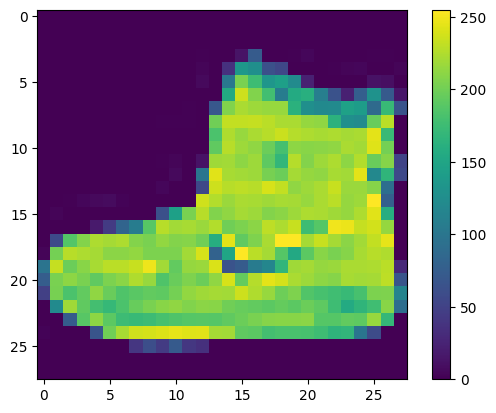

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# Scale the value from 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0 

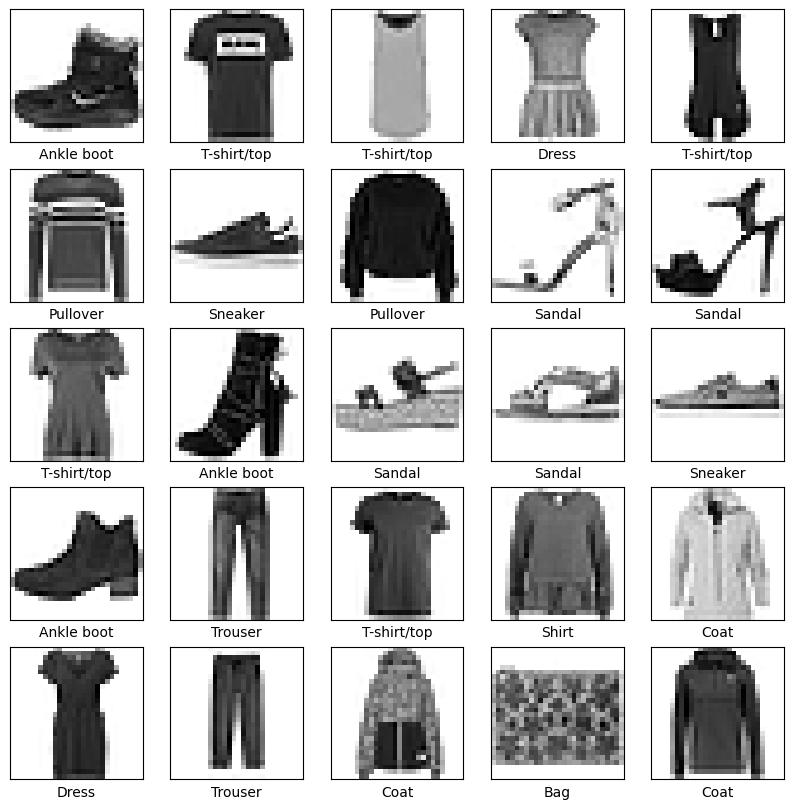

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1) # 5, 5 means 5 rows 5 columns
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4993 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3734 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3349 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3120 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2941 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2808 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2692 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2483 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.238

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy: ', test_acc)
# If the test accuracy is lower than the model training accuracy, it means the data is overfitted, high variance

313/313 - 1s - loss: 0.3427 - accuracy: 0.8834 - 872ms/epoch - 3ms/step

Test Accuracy:  0.883400022983551


In [11]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [13]:
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


In [14]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777") # Some show but the value is very small
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

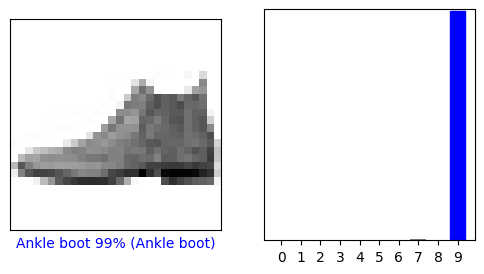

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

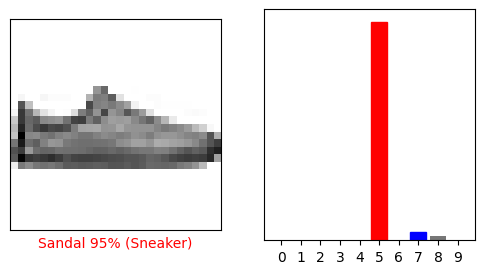

In [16]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

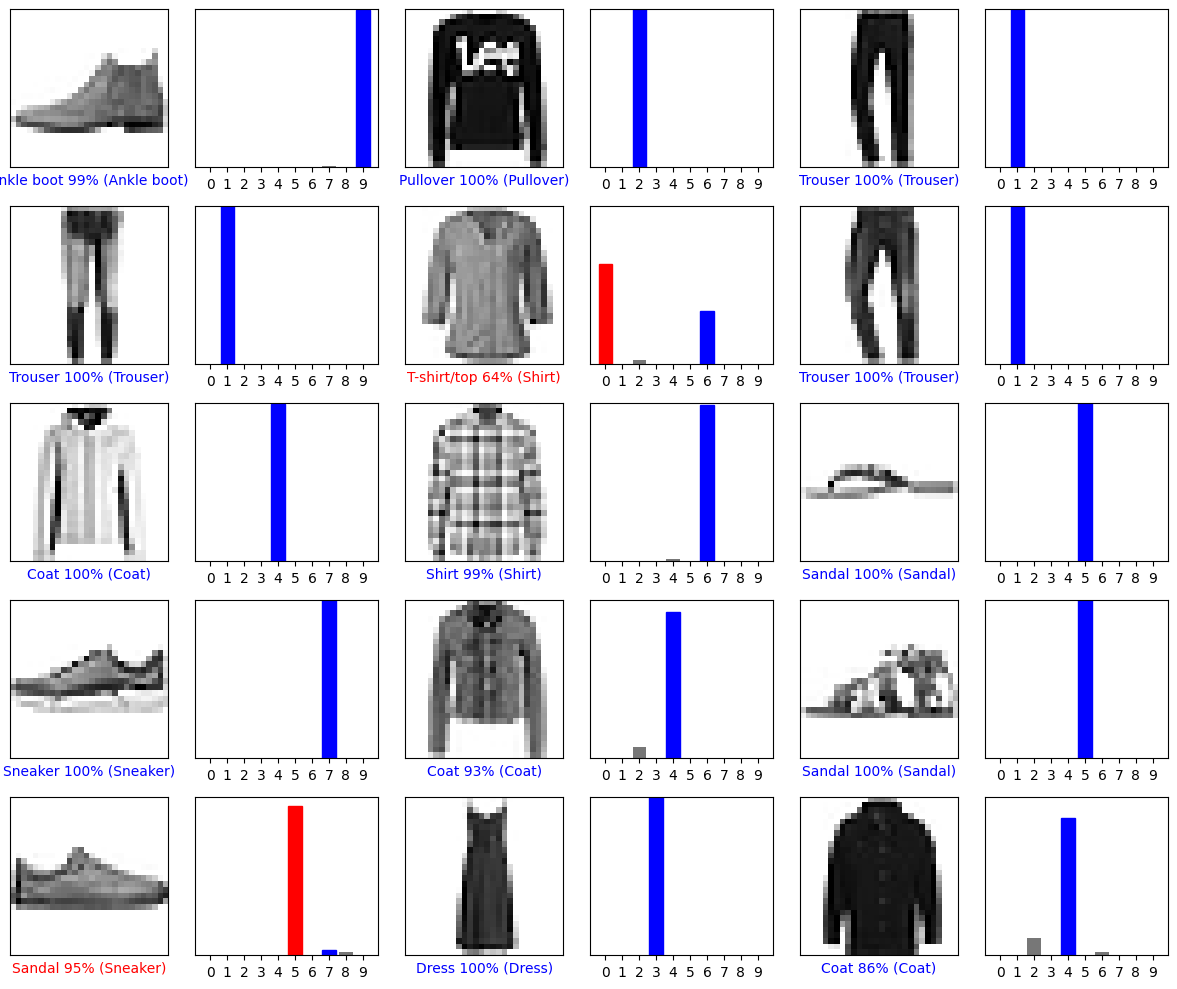

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) # figsize(12, 10) 
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, (2*i)+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, (2*i)+2)
  plot_value_array(i, predictions[i],  test_labels)
plt.tight_layout()
plt.show()


In [33]:
img = test_images[1]
print(img.shape)

(28, 28)
